In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### generate clusters

In [2]:
c1_mean = 2
c1_std = 2
c2_mean = -2
c2_std = 2

train_c1_x = np.random.normal(c1_mean, c1_std, 100)
train_c1_y = np.random.normal(c1_mean, c1_std, 100)
train_c2_x = np.random.normal(c2_mean, c2_std, 100)
train_c2_y = np.random.normal(c2_mean, c2_std, 100)
test_c1_x = np.random.normal(c1_mean, c1_std, 100)
test_c1_y = np.random.normal(c1_mean, c1_std, 100)
test_c2_x = np.random.normal(c2_mean, c2_std, 100)
test_c2_y = np.random.normal(c2_mean, c2_std, 100)

train_c1 = np.vstack((train_c1_x, train_c1_y)).T
train_c2 = np.vstack((train_c2_x, train_c2_y)).T
test_c1 = np.vstack((test_c1_x, test_c1_y)).T
test_c2 = np.vstack((test_c2_x, test_c2_y)).T

##### plot the clusters

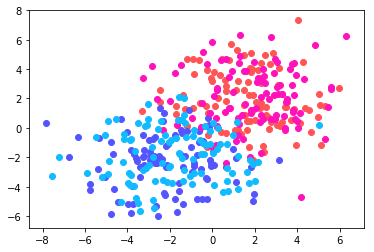

In [3]:
plt.scatter(*zip(*train_c1), c='#ff5555')
plt.scatter(*zip(*train_c2), c='#5555ff')
plt.scatter(*zip(*test_c1), c='#ff11bb')
plt.scatter(*zip(*test_c2), c='#11bbff')

plt.show()

##### def sigmoid

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

##### define loss function

In [5]:
def get_diff(target_label, point, u ,v ,b):
    x, y = point[0], point[1]
    res = -(target_label * np.log(sigmoid(u*x + v*y + b)) + (1-target_label)*np.log(1-sigmoid(u*x + v*y + b)))
    return res

def get_loss(c1, c2, u, v, b):
    res = 0
    for c1_point in c1:
        res += get_diff(0, c1_point, u ,v ,b)
    for c2_point in c2:
        res += get_diff(1, c2_point, u ,v ,b)
    return res
    
def get_acc(c1, c2, u, v, b):
    total = 0    
    correct = 0
    for point in c1:
        res = (sigmoid(u*point[0] + v*point[1] + b) <= 1/2)
        total += 1
        if res:
             correct += 1
    for point in c2:
        res = (sigmoid(u*point[0] + v*point[1] + b) > 1/2)
        total += 1
        if res:
             correct += 1
    return correct/total

##### gradient descent

In [6]:
u,v,b = 0,0,0
k = 0.00002 # how far from previous iteration

train_loss_list = list()
train_acc_list = list()
test_loss_list = list()
test_acc_list = list()

TRESH_HOLD = 0.001
MAX_ITERATION = 100000
iteration = 0
while True:
    prev_loss = 0
    loss = get_loss(train_c1, train_c2, u, v, b)
    acc = get_acc(train_c1, train_c2, u, v, b)
    test_loss = get_loss(test_c1, test_c2, u,v,b)
    test_acc = get_acc(test_c1, test_c2, u,v,b)
    # print("u:" + str(u))
    # print("v:" + str(v))
    # print("b:" + str(b))
    # print("acc:" + str(acc))
    # print("loss:" + str(loss))
    if abs(prev_loss-loss) < TRESH_HOLD or iteration >= MAX_ITERATION:
        break
    train_loss_list.append(loss)
    train_acc_list.append(acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    prev_loss = loss
    
    u_direction, v_direction, b_direction = 0, 0 ,0
    for point in train_c1:
        x, y = point[0], point[1]
        label = 0
        u_direction += (sigmoid(u*x + v*y + b)- label) * x 
        v_direction += (sigmoid(u*x + v*y + b)- label) * y
        b_direction += (sigmoid(u*x + v*y + b)- label) * 1
    for point in train_c2:
        x, y = point[0], point[1]
        label = 1
        u_direction += (sigmoid(u*x + v*y + b)- label) * x 
        v_direction += (sigmoid(u*x + v*y + b)- label) * y
        b_direction += (sigmoid(u*x + v*y + b)- label) * 1
    if u_direction < 0:
        u += k
    elif u_direction > 0:
        u -= k
    if v_direction < 0:
        v += k
    elif v_direction > 0:
        v -= k
    if b_direction < 0:
        b += k
    elif b_direction > 0:
        b -= k
    iteration += 1

##### plot the accuracy, loss

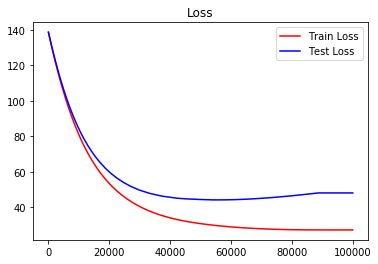

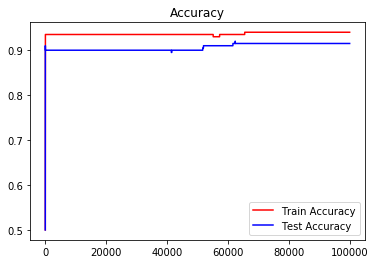

In [7]:
plt.plot(train_loss_list, color='#ff0000', label='Train Loss')
plt.plot(test_loss_list, color='#0000ff', label='Test Loss')
plt.legend(['Train Loss','Test Loss'])
plt.title('Loss')
plt.show()

plt.plot(train_acc_list, color='#ff0000', label='Train Accuracy')
plt.plot(test_acc_list, color='#0000ff', label='Test Accuracy')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Accuracy')
plt.show()